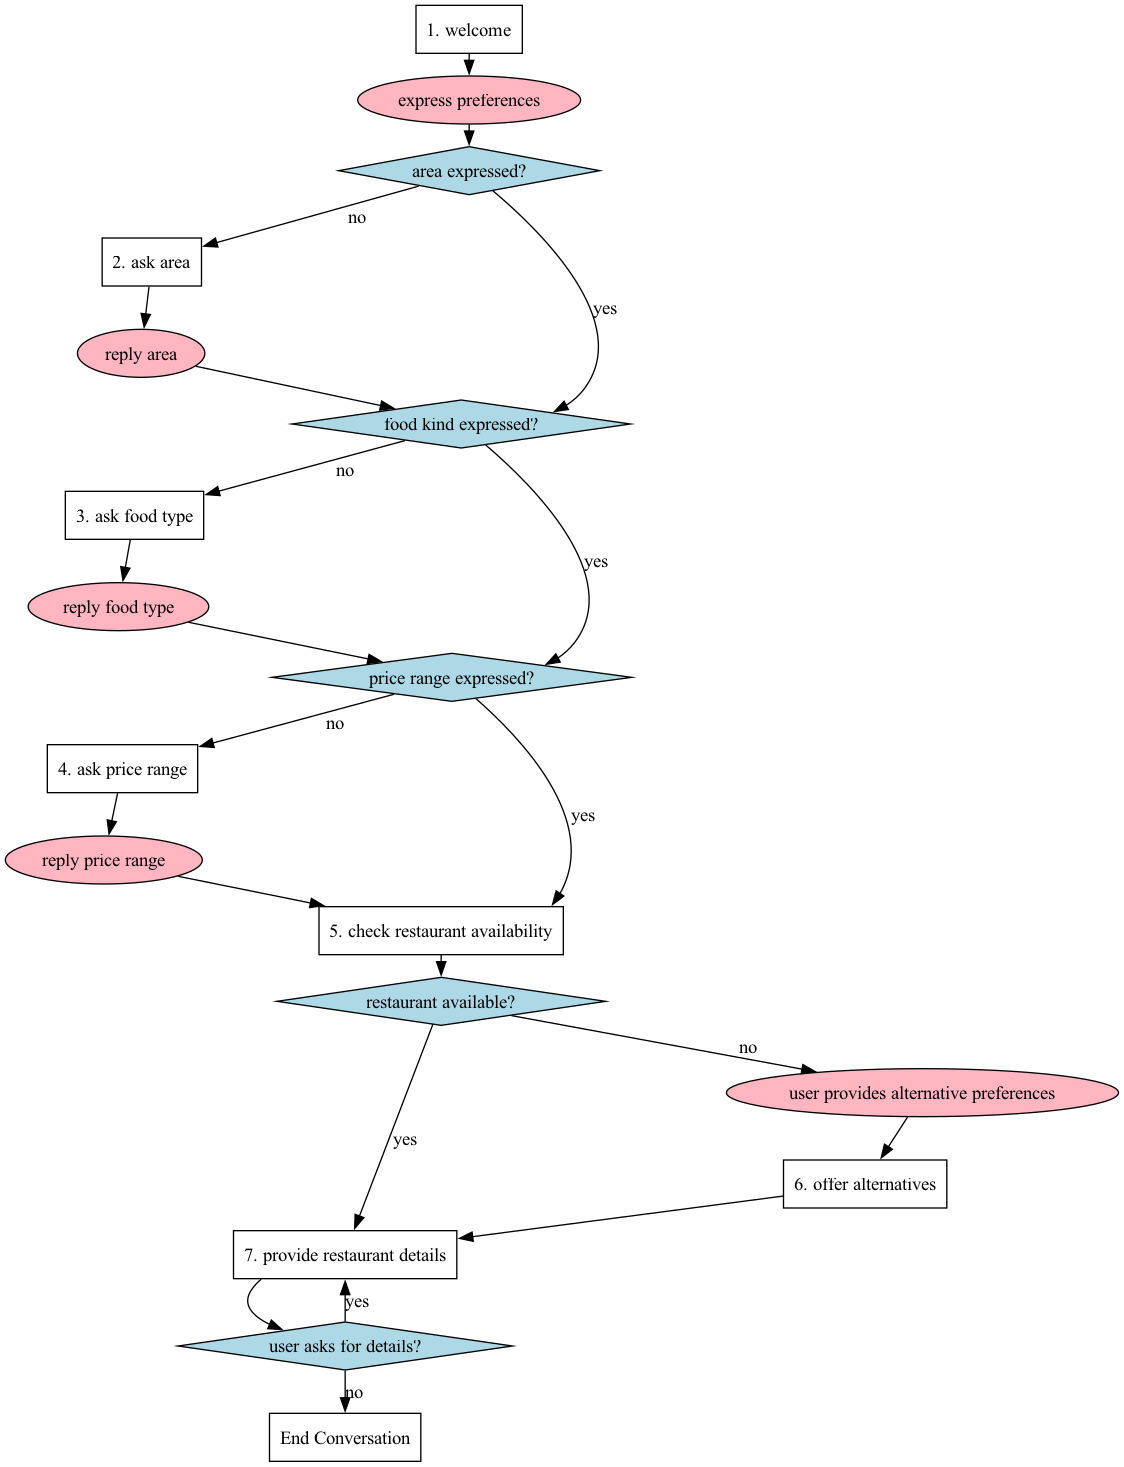

In [1]:
"""Part 1b"""
import graphviz
from IPython.display import Image, display

# create a new graph
diagram = graphviz.Digraph('Restaurant Recommendation System', format='png')
diagram.attr(rankdir='TB', nodesep='4', ranksep='0.2')

# define the nodes
diagram.attr('node', shape='box')
diagram.node('1', '1. welcome')
diagram.node('2', '2. ask area')
diagram.node('3', '3. ask food type')
diagram.node('4', '4. ask price range')
diagram.node('5', '5. check restaurant availability')
diagram.node('6', '6. offer alternatives')
diagram.node('7', '7. provide restaurant details')
diagram.node('8', 'End Conversation')

# define the expressions
diagram.attr('node', shape="ellipse", style='filled', fillcolor="lightpink")
diagram.node('i','express preferences')
diagram.node('ii','reply area')
diagram.node('iii','reply food type')
diagram.node('iv','reply price range')
diagram.node('v', 'user provides alternative preferences')

# define tussenstadia
diagram.attr('node', shape="diamond", style='filled', fillcolor='lightblue')
diagram.node('a', 'area expressed?')
diagram.node('b','food kind expressed?')
diagram.node('c','price range expressed?')
diagram.node('d','restaurant available?')
diagram.node('e','user asks for details?')

# Define the transitions
diagram.edge('1', 'i')
diagram.edge('i','a')
diagram.edge('a','2', label="no")
diagram.edge('a','b',label="yes")
diagram.edge ('2','ii')
diagram.edge('ii','b')
diagram.edge('b','3', label="no")
diagram.edge('b','c',label="yes")
diagram.edge('3','iii')
diagram.edge('iii','c')
diagram.edge('c','4',label="no")
diagram.edge('c','5',label="yes")
diagram.edge('4','iv')
diagram.edge('iv','5')
diagram.edge('5','d')
diagram.edge('d','v',label='no')
diagram.edge('d','7',label="yes")
diagram.edge('v','6')
diagram.edge('6','7')
diagram.edge('7','e')
diagram.edge('e','7', label="yes")
diagram.edge('e','8',label='no')


img = diagram.pipe(format='png')  # Render diagram in memory
display(Image(img))  # Display image directly in the notebook

# create a new graph
diagram = graphviz.Digraph('Restaurant Recommendation System', format='png')
diagram.attr(rankdir='TB', nodesep='1', ranksep='0.2')

# define the nodes
diagram.attr('node', shape='box')
diagram.node('1', '1. welcome')
diagram.node('2', '2. ask food type')
diagram.node('3', '3. check restaurant availability')
diagram.node('4', '4. affirm user does not care')

# define the expressions
diagram.attr('node', shape="ellipse", style='filled', fillcolor="lightpink")
diagram.node('i','express preferences')
diagram.node('ii','reply food type')
diagram.node('iii','affirm')

# define tussenstadia
diagram.attr('node', shape="diamond", style='filled', fillcolor='lightblue')
diagram.node('a', 'food kind expressed?')
diagram.node('b', 'price range expressed?')
diagram.node('c', 'food kind expressed?')
diagram.node('d', 'price range expressed?')
diagram.node('')

# Define the transitions 
diagram.edge('1', 'i')
diagram.edge('i','a')
diagram.edge('a','b', label="no")
diagram.edge('a','3',label="yes")
diagram.edge ('b','2',label="no")
diagram.edge('b','3',label="yes")
diagram.edge('ii','c')
diagram.edge('2', 'ii')
diagram.edge('c','3', label="yes")
diagram.edge('c','d',label="no")
diagram.edge('d', '4',label="no")
diagram.edge('d','3',label="yes")
diagram.edge('4','iii')
diagram.edge('iii','3')

img = diagram.pipe(format='png')  # Render diagram in memory
display(Image(img))  # Display image directly in the notebook


In [5]:
#dialogmanament
import pandas as pd
"""je moeder"""
info = dict()
food = []
area = []
pricerange = []

def dataread(filename):
    df = pd.read_csv(filename)
    #print(df)
    food = []
    area = []
    pricerange = []
    for i in df.iloc:
        #print(i[2])
        food.append(i[3])
        area.append(i[2])
        pricerange.append(i[1])
    food = set(food)
    area = set(area)
    pricerange = set(pricerange) 
    return food, area, pricerange

def match(input1):
    for word in input1:
        if word in food:
            return "food"
        if word in pricerange:
            return "pricerange"
        if word in area:
            return "area"
        else:
            return "somethingelse"
            

food, area, pricerange = dataread("../data/restaurant_info.csv")
print("system: Welcome to the best restaurant chatbot ever. What kind of food do you like?")
#input1 = input()
#start(input1)


system: Welcome to the best restaurant chatbot ever. What kind of food do you like?
{'moderate', 'cheap', 'expensive'}


In [8]:
!pip install Levenshtein

In [12]:
import sys
import os
import pandas as pd
import ml_2_logistic_regression as lr

import keyword_mapping as km
restaurant_database = pd.read_csv("../data/restaurant_info.csv")
preference_categories_dict = km.initiate_category_dict(restaurant_database)
#preferences_list = km.extract_preferences("want italian food but also cheap", preference_categories_dict)
#print(km.get_restaurant(preferences_list, restaurant_database))
def start(input1):
    matched = match(input1) #todo good, now its shit
    if matched == "food":
        askfood(input1)
        print("In what area do you want to eat?")
        askarea(input)
        print('what pricerange?')
        askprice()
        
    if matched == "price":
        askarea(input)
        print('what kind of food mate')
        askfood(input1)
        print('what pricerange?')
        askprice(input)
    if matched == "area":
        askprice(input)
        print("In what area do you want to eat?")

        askarea(input)
        print('what kind of food mate')
        askfood(input1)
       
    else:
        print("youre not making any sense you plonker")
        start(input)
        #continue
    #preferences_list = km.extract_preferences(input1, preference_categories_dict)
    #print(km.get_restaurant(preferences_list, restaurant_database))
def askfood(input1):
    if food_expressed:
            info["food"] = the_food
    else:
        print("be more specific bro")
        askfood(input())
def askarea(input1):
    if area_expressed:
            info["area"] = the_area
    else:
        print("be more specific bro")
        askarea(input())
def askprice(input1):
    if price_expressed:
            info["price"] = the_price
    else:
        print("be more specific bro")
        askprice(input())


In [ ]:
import sys
import os
import pandas as pd
import ml_2_logistic_regression as lr

import keyword_mapping as km
restaurant_database = pd.read_csv("../data/restaurant_info.csv")
preference_categories_dict = km.initiate_category_dict(restaurant_database)
#preferences_list = km.extract_preferences("want italian food but also cheap", preference_categories_dict)
#print(km.get_restaurant(preferences_list, restaurant_database))
def start(input1):
    matched = match(input1) #todo good, now its shit
    if matched == "food":
        askfood(input1)
        print("In what area do you want to eat?")
        askarea(input)
        print('what pricerange?')
        askprice()
        
    if matched == "price":
        askarea(input)
        print('what kind of food mate')
        askfood(input1)
        print('what pricerange?')
        askprice(input)
    if matched == "area":
        askprice(input)
        print("In what area do you want to eat?")

        askarea(input)
        print('what kind of food mate')
        askfood(input1)
       
    else:
        print("youre not making any sense you plonker")
        start(input)
        #continue
    #preferences_list = km.extract_preferences(input1, preference_categories_dict)
    #print(km.get_restaurant(preferences_list, restaurant_database))
def askfood(input1):
    if food_expressed:
            info["food"] = the_food
    else:
        print("be more specific bro")
        askfood(input())
def askarea(input1):
    if area_expressed:
            info["area"] = the_area
    else:
        print("be more specific bro")
        askarea(input())
def askprice(input1):
    if price_expressed:
            info["price"] = the_price
    else:
        print("be more specific bro")
        askprice(input())


In [13]:
print("system: Welcome to the best restaurant chatbot ever. What kind of food do you like?")

inp = input()
start(inp)

system: Welcome to the best restaurant chatbot ever. What kind of food do you like?
